In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import sklearn as sk

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm


%matplotlib inline

#  Pratique avec le dataset Titanic

In [2]:
#charger les données
df=pd.read_csv('./titanic/train.csv')

NameError: name 'pd' is not defined

In [4]:
#verifier que le chargement  est bon et voir à quoi ressemble le dataframe
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# vérifer les dimensions
df.shape

(891, 12)

In [6]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### La signification des colonnes : 

PassengerID : identifiant

Survived : 0 si ce passager n'a pas survécu, 1 sinon 

Pclass : la classe (1, 2 ou 3)

Name : le nom du passager

Sex : femme ou homme (sexe)

Age : l'âge (en années)

SibSp : le nombre de frère, soeur et/ou épouse à bord

Parch : le nombre de parent et/ou d'enfant à bord

Ticket : numéro du ticket

Fare : prix du billet

Cabin : numéro de cabine

Embarked : port d'embarquement(C = Cherbourg, Q = Queenstown, S = Southampton)


### Dans un premier temps on va essayer de comprendre les données 


- Lire et explorer le dataset à partir des fichiers csv. 


In [8]:
df = pd.read_csv('./titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


- Vérifier si le dataset contient des valeurs manquantes ? 

In [9]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

- Proposer une solution pour remplacer les  valeurs manquantes.

Pour la cabine on peut estimer que le numero n'est pas interessant pour predire la survie. On peut retirer cette colonne ou bien remplacer les valeurs maquantes par une valeur "dummy" c'est a dire qui ne porte pas d'information. Par exemple "inconnu". Pour l'age il y a beaucoup de possibilites, on peut essayer de le predire à partir des autres informations, par exemple en fonction du prix du billet. On peut aussi prendre l'âge moyen, la moyenne des ages des N personnes ayant payé le prix du billet le plus proche etc.

In [10]:
def replace_Age_nan_moyenne(df):
    df_m = df.copy()
    df_m.Age = df.Age.fillna(value=df.Age.mean())
    return df_m

def replace_Age_nan_median(df):
    df_m = df.copy()
    df_m.Age = df.Age.fillna(value=df.Age.median())
    return df_m


def get_n_closest_Fare_Class(df, n, fare, pclass):
    """
    Renvoie la moyenne des ages des n passagers avec les prix de billet 
    les plus proches ayant la même classe
    """
    # On récupère les passagers ayant la même classe
    sub_df = df[df.Pclass == pclass].copy()
    
    # Les prix des billets les plus proches sont les n plus petits écarts attention à la valeur absolue!
    sub_df['temp_diff'] = abs(sub_df.Fare-fare) 
    
    # On récupère les n lignes avec les plus petites valeurs de 'temp_diff'
    sub_df = sub_df.nsmallest(n, 'temp_diff')
    
    return sub_df.Age.mean()

def replace_nan_moy_n_FareClass(df, n):
    """
    On remplace les Age manquants par la moyenne des ages des n passagers 
    ayant payé un billet au prix le plus proche pour la même classe.
    """
    rep_df = df.copy()
    # On récupère les passagers pour lesquels l'age est manquant (pas de copie necessaire on ne la modifie pas)
    sub_df = rep_df[pd.isnull(rep_df.Age)]
    
    # Pour chaque passager on calcul l'age moyen des n passagers les plus similaires et on remplace
    for index, row in sub_df.iterrows():
        fare, pclass = row.Fare, row.Pclass
        age_mean = get_n_closest_Fare_Class(rep_df, n, fare, pclass)
        rep_df.at[index,'Age'] = age_mean
    return rep_df

In [13]:
df_mean = replace_Age_nan_moyenne(df)
print(df_mean.isna().sum())
df_med = replace_Age_nan_median(df)
print(df_med.isna().sum())
df_FC = replace_nan_moy_n_FareClass(df, 10)
print(df_FC.isna().sum())

df_mean.drop(columns='Cabin', inplace=True)
df_med.drop(columns='Cabin', inplace=True)
df_FC.drop(columns='Cabin', inplace=True)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


- Est il possible de visualiser les données ?


Il y a de nombreuses facon, en voici quelques exemples :

In [14]:
temp = df.dropna() # on retire les nan pour eviter les erreurs d'affichage

Text(0.5, 1.0, "Prix en fonction de l'âge (vert pour survecu, rouge sinon)")

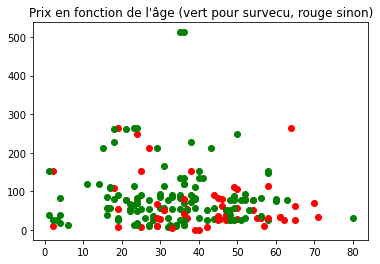

In [ ]:
def get_survived_color(survived):
    return "green" if survived else "red"

for row in temp.itertuples():
    plt.scatter(row.Age, row.Fare, color=get_survived_color(row.Survived))

plt.title("Prix en fonction de l'âge (vert pour survecu, rouge sinon)")

Text(0.5, 1.0, "Prix en fonction de l'âge (bleu pour les femmes, jaune pour les hommes)")

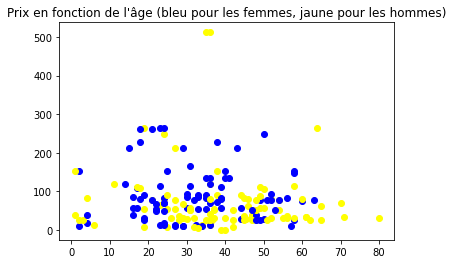

In [16]:
def get_sex_color(sex):
    return "yellow" if sex=="male" else "blue"

for row in temp.itertuples():
    plt.scatter(row.Age, row.Fare, color=get_sex_color(row.Sex))

plt.title("Prix en fonction de l'âge (bleu pour les femmes, jaune pour les hommes)")

In [1]:
N = 3 # 3 classes
width = 0.35       # la largeur des barres

survived_per_class = [ temp[temp.Pclass == x].Survived.sum() for x in [1, 2, 3] ]
not_survived_per_class = [ np.abs(temp[temp.Pclass == x].Survived - 1).sum() for x in [1, 2, 3] ]
ind = np.arange(N)    

p1 = plt.bar(ind, survived_per_class, width)
p2 = plt.bar(ind, not_survived_per_class, width,
             bottom=survived_per_class)

plt.ylabel('Nombre de personnes')
plt.title('Survie par classe')
plt.xticks(ind, ('1', '2', '3'))
plt.legend((p1[0], p2[0]), ('Survecu', 'Pas survecu'))

NameError: name 'temp' is not defined

- Créer une nouvelle colonne qui mentionne le sexe du passager. 

In [18]:
df["sex_as_int"] = (df['Sex'] == 'male').astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,sex_as_int
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


- Combien de personnes ont survécu ? 


In [18]:
df.Survived.sum()

342

- Est ce que la Pclass a plus d'importance que l'âge pour la survie ? 

Pour répondre à cette question, nous allons tester la classification : survived en fontion de l'âge (repectivement Pclass).
On peut tirer une conclusion à partir de la performance mais relativement au modèle utilisé.


In [19]:
y = temp.pop("Survived")

In [20]:
Xtrain, Xtest, ytrain, ytest = train_test_split(temp, y,test_size=0.25, random_state=0)

In [23]:
def get_classification_score(dataset, list_of_features, label, model=svm.SVC(gamma=0.001), dropna=True):
    temp = dataset.copy()
    if dropna:
        temp = temp.dropna()
        
    y = temp.pop(label)
    
    Xtrain, Xtest, ytrain, ytest = train_test_split(temp, y,test_size=0.25, random_state=0)
    
    Xtrain = Xtrain[list_of_features].values
    Xtest = Xtest[list_of_features].values
    
    if len(Xtrain.shape) < 2:
        Xtrain = Xtrain.reshape(-1, 1)
        
    if len(Xtest.shape) < 2:
        Xtest = Xtest.reshape(-1, 1)
        
    model.fit(Xtrain,ytrain)

    ypredit = model.predict(Xtest)
    return accuracy_score(ytest, ypredit)


def compare_features(
    dataset, 
    list_of_features_1, 
    list_of_features_2,
    label,
    dropna = True
    ):
    
    score_1 = get_classification_score(dataset, list_of_features_1, label)
    score_2 = get_classification_score(dataset, list_of_features_2, label)
    
    print(f"Avec les colonnes {list_of_features_1}, le score est de {score_1}.")
    print(f"Avec les colonnes {list_of_features_2}, le score est de {score_2}.")

In [24]:
compare_features(df, ["Pclass"], ["Age"], "Survived")

Avec les colonnes ['Pclass'], le score est de 0.8043478260869565.
Avec les colonnes ['Age'], le score est de 0.7391304347826086.


### Dans un deuxième temps on va transformer quelques colonnes

- Transformer le sexe en nombre 



In [25]:
df["Sex"] = (df['Sex'] == 'male').astype(int)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",0,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",0,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",0,58.0,0,0,113783,26.5500,C103,S


- On teste si (âge et sexe) est mieux que (classe, sexe)

In [26]:
df = pd.read_csv('./titanic/train.csv')
df = df.dropna()

df["Sex"] = (df['Sex'] == 'male').astype(int)

compare_features(df, ["Age", "Sex"], ["Pclass", "Sex"], "Survived")

Avec les colonnes ['Age', 'Sex'], le score est de 0.7391304347826086.
Avec les colonnes ['Pclass', 'Sex'], le score est de 0.8043478260869565.


- On teste la performance des trois 


In [27]:
df = pd.read_csv('./titanic/train.csv')
df = df.dropna()

df["Sex"] = (df['Sex'] == 'male').astype(int)

get_classification_score(df, ["Age", "Sex", "Pclass"], "Survived")

0.7391304347826086

- Proposer comment transformer d'autres colonnes 


La colonne Embarked peut être transformée en int 

In [28]:
def encode_embarked(code):
    if code == "Q":
        return 0
    if code == "S":
        return 1
    if code == "C":
        return 2
    
    raise Exception(f"Unknown code: {code}")



- Tester l'importance de chaque colonne à part, des combinaisons, etc. 

- Conclure après plusieurs tests : modèles + features

In [30]:
def generate_random_features_list(all_features, max_features=-1):
    if max_features == -1:
        return all_features
    n_features = np.random.randint(1, max_features+1)
    return np.random.choice(all_features, size=n_features, replace=False)

def get_random_model():
    Arbre_decision = DecisionTreeClassifier(random_state=0, max_depth=20)
    KNN = KNeighborsClassifier()
    svc = svm.SVC(gamma=0.001)
    
    return np.random.choice([Arbre_decision, KNN, svc], size=1)[0]

In [32]:
df = pd.read_csv('./titanic/train.csv')
df = df.dropna()

df["Sex"] = (df['Sex'] == 'male').astype(int)
df["Embarked"] = df["Embarked"].apply(encode_embarked)

all_features = ['Pclass', 'Sex', 'Age', 'SibSp',
       'Parch', 'Fare', 'Embarked']


In [30]:
for i in range(30):
    features = generate_random_features_list(all_features, len(all_features))
    score = get_classification_score(df, features, "Survived")
    model = get_random_model()
    print(f"{model} + {features} : {score}")

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best') + ['Sex'] : 0.8043478260869565
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=20, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best') + ['Sex' 'SibSp'] : 0.8043478260869565
SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decisio